Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10


C:\Users\rohit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8594 - loss: 0.3126

C:\Users\rohit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1184s 7s/step - accuracy: 0.8597 - loss: 0.3121 - val_accuracy: 0.7500 - val_loss: 0.5157
Training Loss: 0.2312 - Training Accuracy: 0.9030
Validation Loss: 0.5157 - Validation Accuracy: 0.7500

Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1127s 7s/step - accuracy: 0.9383 - loss: 0.1622 - val_accuracy: 0.6875 - val_loss: 0.9396
Training Loss: 0.1605 - Training Accuracy: 0.9392
Validation Loss: 0.9396 - Validation Accuracy: 0.6875

Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1063s 7s/step - accuracy: 0.9477 - loss: 0.1457 - val_accuracy: 0.7500 - val_loss: 0.6576
Training Loss: 0.1457 - Training Accuracy: 0.9456
Validation Loss: 0.6576 - Validation Accuracy: 0.7500

Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 7069s 44s/step - accuracy: 0.9491 - loss: 0.1272 - val_accuracy: 0.7500 - val_loss: 0.3476
Training Loss: 0.1264 - Training Accuracy: 0.9525
Validation Loss: 0.3476 - Validation Accuracy: 0.7500

Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1074s 7s/step - accuracy: 0.95

Training Loss: 0.1132 - Training Accuracy: 0.9574
Validation Loss: 0.4709 - Validation Accuracy: 0.7500

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7500 - loss: 0.4709
Validation Accuracy: 75.00%


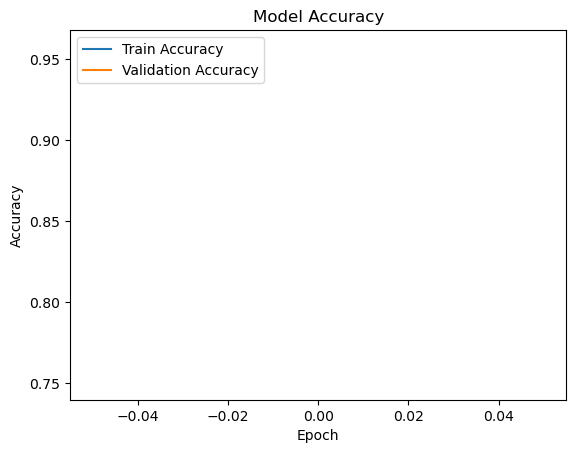

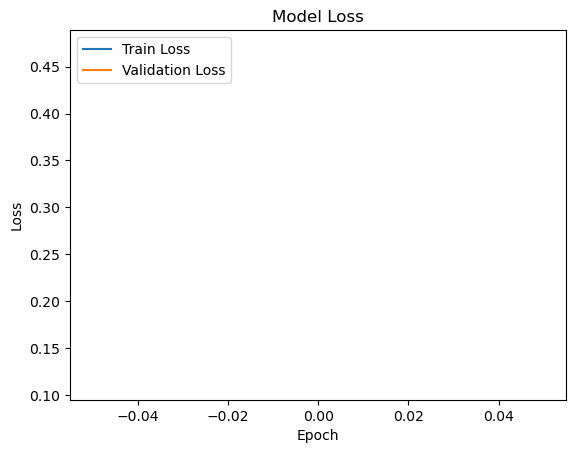

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Load VGG16 model, excluding the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (VGG16)
base_model.trainable = False

# Define the model
model = Sequential([
    base_model,  # VGG16 as the base
    Flatten(),  # Flatten the output of VGG16
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification (pneumonia vs no pneumonia)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=30,  # Randomly rotate images
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Only rescale validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_set = train_datagen.flow_from_directory(
    'C:\\Users\\rohit\\lunglens2\\chest_xray\\chest_xray\\train',  # Specify path to training dataset
    target_size=(224, 224),  # Resize images to 224x224 (required by VGG16)
    batch_size=32,
    class_mode='binary'  # Binary classification (pneumonia or no pneumonia)
)

val_set = val_datagen.flow_from_directory(
    'C:\\Users\\rohit\\lunglens2\\chest_xray\\chest_xray\\val',  # Specify path to validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Number of epochs to train
num_epochs = 10

# Manual loop for training
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    history = model.fit(
        train_set,
        validation_data=val_set,
        epochs=1  # Train for one epoch at a time
    )
    # Print accuracy and loss for the current epoch
    print(f"Training Loss: {history.history['loss'][0]:.4f} - Training Accuracy: {history.history['accuracy'][0]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][0]:.4f} - Validation Accuracy: {history.history['val_accuracy'][0]:.4f}\n")

# Save the model for future use
model.save('vgg16_pneumonia_detection.h5')

# Evaluate the model performance on the validation data
val_loss, val_acc = model.evaluate(val_set)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plotting the training and validation accuracy/loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [6]:
model.save('vgg16_pneumonia_detection.keras')

In [8]:
# Evaluate the model performance on the validation data
val_loss, val_acc = model.evaluate(val_set)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7500 - loss: 0.4709
Validation Accuracy: 75.00%


In [14]:
import pickle

# Assume 'model' is your trained machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
